In [5]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string # for text manipulation 
import warnings 
import numpy as np 
import pandas as pd # for data manipulation 
import matplotlib.pyplot as plt

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore") #ignore warnings

import os
for dirname, _, filenames in os.walk('/content/TWITTER.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

%matplotlib inline

In [6]:
data = pd.read_csv("/content/TWITTER.csv",encoding='latin-1')
data.head()

,0,2285370379,Mon Jun 22 15:02:47 PDT 2009,NO_QUERY,TheWookieWay,"no, it was resheduled for Thursday"
0,0,2285370474,Mon Jun 22 15:02:48 PDT 2009,NO_QUERY,idmoore,"@Opotopo small slip on Tryfan few weeks back, felt side pull but didnt think it was bad. Muscle went between ribs. Did me for 2 weeks"
1,0,2285370823,Mon Jun 22 15:02:49 PDT 2009,NO_QUERY,xbeautifulmessx,@Idristwilight You can post HAN when you want. It's great! I am still working on TLD though. I got a little distracted so sorry.
2,0,2285371185,Mon Jun 22 15:02:51 PDT 2009,NO_QUERY,thefirstsight,"@rose_7 Ohh poor jan please tell her that if she cans, send us an email!!"
3,0,2285371495,Mon Jun 22 15:02:52 PDT 2009,NO_QUERY,Sarah2713,Finally home from work...It was a looong day!! And it's only Monday
4,0,2285371762,Mon Jun 22 15:02:54 PDT 2009,NO_QUERY,dierockerfrau,im very sad 4 chantelle and tom


In [7]:
print('Length of the dataset is:',len(data))
data.shape

Length of the dataset is: 59210


(59210, 6)

In [8]:
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "TweetText"]
data.columns = DATASET_COLUMNS
data.head()

,target,ids,date,flag,user,TweetText
0,0,2285370474,Mon Jun 22 15:02:48 PDT 2009,NO_QUERY,idmoore,"@Opotopo small slip on Tryfan few weeks back, felt side pull but didnt think it was bad. Muscle went between ribs. Did me for 2 weeks"
1,0,2285370823,Mon Jun 22 15:02:49 PDT 2009,NO_QUERY,xbeautifulmessx,@Idristwilight You can post HAN when you want. It's great! I am still working on TLD though. I got a little distracted so sorry.
2,0,2285371185,Mon Jun 22 15:02:51 PDT 2009,NO_QUERY,thefirstsight,"@rose_7 Ohh poor jan please tell her that if she cans, send us an email!!"
3,0,2285371495,Mon Jun 22 15:02:52 PDT 2009,NO_QUERY,Sarah2713,Finally home from work...It was a looong day!! And it's only Monday
4,0,2285371762,Mon Jun 22 15:02:54 PDT 2009,NO_QUERY,dierockerfrau,im very sad 4 chantelle and tom


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59210 entries, 0 to 59209
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   target     59210 non-null  int64 
 1   ids        59210 non-null  int64 
 2   date       59210 non-null  object
 3   flag       59210 non-null  object
 4   user       59210 non-null  object
 5   TweetText  59210 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.7+ MB


In [10]:
data.isnull().sum()

target       0
ids          0
date         0
flag         0
user         0
TweetText    0
dtype: int64

In [11]:
data.drop(['ids','date','flag','user'],axis = 1,inplace = True)

In [12]:
data.head()

,target,TweetText
0,0,"@Opotopo small slip on Tryfan few weeks back, felt side pull but didnt think it was bad. Muscle went between ribs. Did me for 2 weeks"
1,0,@Idristwilight You can post HAN when you want. It's great! I am still working on TLD though. I got a little distracted so sorry.
2,0,"@rose_7 Ohh poor jan please tell her that if she cans, send us an email!!"
3,0,Finally home from work...It was a looong day!! And it's only Monday
4,0,im very sad 4 chantelle and tom


# Data Cleaning

Removing Twitter Handles (@user)

In [13]:
data['Clean_TweetText'] = data['TweetText'].str.replace("@", "") 
data.head()

,target,TweetText,Clean_TweetText
0,0,"@Opotopo small slip on Tryfan few weeks back, felt side pull but didnt think it was bad. Muscle went between ribs. Did me for 2 weeks","Opotopo small slip on Tryfan few weeks back, felt side pull but didnt think it was bad. Muscle went between ribs. Did me for 2 weeks"
1,0,@Idristwilight You can post HAN when you want. It's great! I am still working on TLD though. I got a little distracted so sorry.,Idristwilight You can post HAN when you want. It's great! I am still working on TLD though. I got a little distracted so sorry.
2,0,"@rose_7 Ohh poor jan please tell her that if she cans, send us an email!!","rose_7 Ohh poor jan please tell her that if she cans, send us an email!!"
3,0,Finally home from work...It was a looong day!! And it's only Monday,Finally home from work...It was a looong day!! And it's only Monday
4,0,im very sad 4 chantelle and tom,im very sad 4 chantelle and tom


Removing links

In [14]:
data['Clean_TweetText'] = data['Clean_TweetText'].str.replace(r"http\S+", "") 
data.head()

,target,TweetText,Clean_TweetText
0,0,"@Opotopo small slip on Tryfan few weeks back, felt side pull but didnt think it was bad. Muscle went between ribs. Did me for 2 weeks","Opotopo small slip on Tryfan few weeks back, felt side pull but didnt think it was bad. Muscle went between ribs. Did me for 2 weeks"
1,0,@Idristwilight You can post HAN when you want. It's great! I am still working on TLD though. I got a little distracted so sorry.,Idristwilight You can post HAN when you want. It's great! I am still working on TLD though. I got a little distracted so sorry.
2,0,"@rose_7 Ohh poor jan please tell her that if she cans, send us an email!!","rose_7 Ohh poor jan please tell her that if she cans, send us an email!!"
3,0,Finally home from work...It was a looong day!! And it's only Monday,Finally home from work...It was a looong day!! And it's only Monday
4,0,im very sad 4 chantelle and tom,im very sad 4 chantelle and tom


Removing Punctuations, Numbers, and Special Characters

In [15]:
data['Clean_TweetText'] = data['Clean_TweetText'].str.replace("[^a-zA-Z]", " ") 
data.head()

,target,TweetText,Clean_TweetText
0,0,"@Opotopo small slip on Tryfan few weeks back, felt side pull but didnt think it was bad. Muscle went between ribs. Did me for 2 weeks",Opotopo small slip on Tryfan few weeks back felt side pull but didnt think it was bad Muscle went between ribs Did me for weeks
1,0,@Idristwilight You can post HAN when you want. It's great! I am still working on TLD though. I got a little distracted so sorry.,Idristwilight You can post HAN when you want It s great I am still working on TLD though I got a little distracted so sorry
2,0,"@rose_7 Ohh poor jan please tell her that if she cans, send us an email!!",rose Ohh poor jan please tell her that if she cans send us an email
3,0,Finally home from work...It was a looong day!! And it's only Monday,Finally home from work It was a looong day And it s only Monday
4,0,im very sad 4 chantelle and tom,im very sad chantelle and tom


In [16]:
data['target'] = data['target'].replace(4,1)

In [17]:
data['target'].unique()

array([0, 1])

Remove stop words

In [18]:
import nltk
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text

In [20]:
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda text : remove_stopwords(text.lower()))
data.head()

,target,TweetText,Clean_TweetText
0,0,"@Opotopo small slip on Tryfan few weeks back, felt side pull but didnt think it was bad. Muscle went between ribs. Did me for 2 weeks",opotopo small slip tryfan weeks back felt side pull didnt think bad muscle went ribs weeks
1,0,@Idristwilight You can post HAN when you want. It's great! I am still working on TLD though. I got a little distracted so sorry.,idristwilight post han want great still working tld though got little distracted sorry
2,0,"@rose_7 Ohh poor jan please tell her that if she cans, send us an email!!",rose ohh poor jan please tell cans send us email
3,0,Finally home from work...It was a looong day!! And it's only Monday,finally home work looong day monday
4,0,im very sad 4 chantelle and tom,im sad chantelle tom


Text Tokenization and Normalization

In [21]:
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: x.split())
data.head()

,target,TweetText,Clean_TweetText
0,0,"@Opotopo small slip on Tryfan few weeks back, felt side pull but didnt think it was bad. Muscle went between ribs. Did me for 2 weeks","[opotopo, small, slip, tryfan, weeks, back, felt, side, pull, didnt, think, bad, muscle, went, ribs, weeks]"
1,0,@Idristwilight You can post HAN when you want. It's great! I am still working on TLD though. I got a little distracted so sorry.,"[idristwilight, post, han, want, great, still, working, tld, though, got, little, distracted, sorry]"
2,0,"@rose_7 Ohh poor jan please tell her that if she cans, send us an email!!","[rose, ohh, poor, jan, please, tell, cans, send, us, email]"
3,0,Finally home from work...It was a looong day!! And it's only Monday,"[finally, home, work, looong, day, monday]"
4,0,im very sad 4 chantelle and tom,"[im, sad, chantelle, tom]"


In [22]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: [stemmer.stem(i) for i in x])
data.head()

,target,TweetText,Clean_TweetText
0,0,"@Opotopo small slip on Tryfan few weeks back, felt side pull but didnt think it was bad. Muscle went between ribs. Did me for 2 weeks","[opotopo, small, slip, tryfan, week, back, felt, side, pull, didnt, think, bad, muscl, went, rib, week]"
1,0,@Idristwilight You can post HAN when you want. It's great! I am still working on TLD though. I got a little distracted so sorry.,"[idristwilight, post, han, want, great, still, work, tld, though, got, littl, distract, sorri]"
2,0,"@rose_7 Ohh poor jan please tell her that if she cans, send us an email!!","[rose, ohh, poor, jan, pleas, tell, can, send, us, email]"
3,0,Finally home from work...It was a looong day!! And it's only Monday,"[final, home, work, looong, day, monday]"
4,0,im very sad 4 chantelle and tom,"[im, sad, chantel, tom]"


Now let’s stitch these tokens back together

In [23]:
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x]))
data.head()

,target,TweetText,Clean_TweetText
0,0,"@Opotopo small slip on Tryfan few weeks back, felt side pull but didnt think it was bad. Muscle went between ribs. Did me for 2 weeks",opotopo small slip tryfan week back felt side pull didnt think bad muscl went rib week
1,0,@Idristwilight You can post HAN when you want. It's great! I am still working on TLD though. I got a little distracted so sorry.,idristwilight post han want great still work tld though got littl distract sorri
2,0,"@rose_7 Ohh poor jan please tell her that if she cans, send us an email!!",rose ohh poor jan pleas tell can send us email
3,0,Finally home from work...It was a looong day!! And it's only Monday,final home work looong day monday
4,0,im very sad 4 chantelle and tom,im sad chantel tom


Removing small words

In [24]:
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
data.head()
data.shape

(59210, 3)

In [25]:
from wordcloud import WordCloud 

Data Vizualisation

In this section we will visualize the tweets using wordclouds. A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

What are the most common words in the entire dataset?

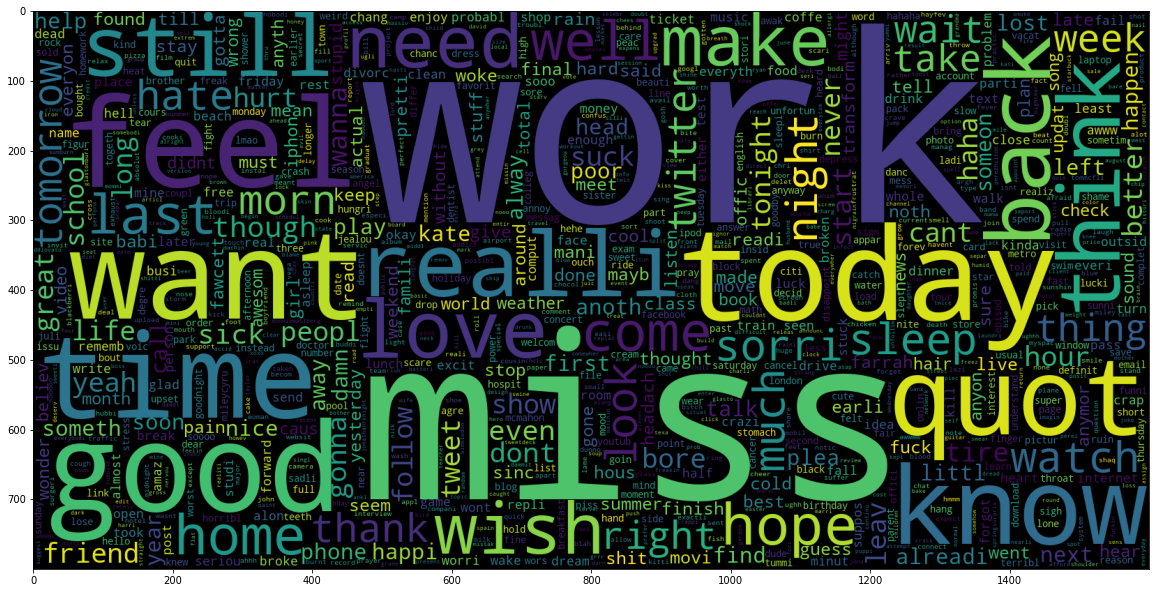

In [26]:
all_words = data['Clean_TweetText']
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(all_words))
plt.figure(figsize = (20,20))
plt.imshow(wc)

What are the most common words in the dataset for Positive and Depressive tweets, respectively?

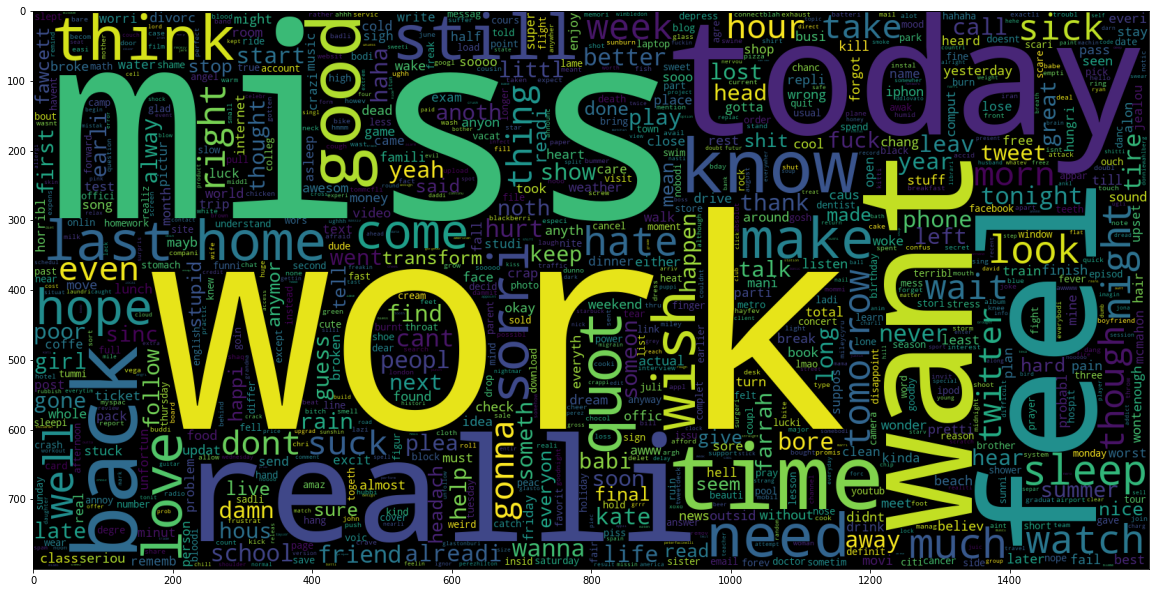

In [27]:
data_neg = data['Clean_TweetText'][:50000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

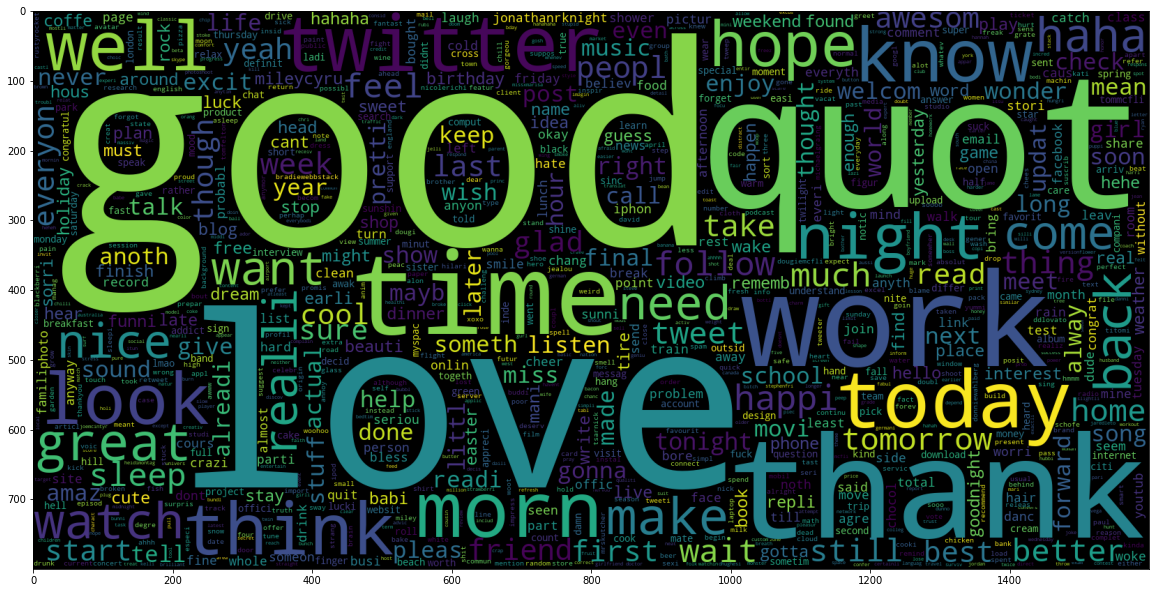

In [28]:
data_pos = data['Clean_TweetText'][50001:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

# Model building

In [29]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
count_vectorizer = CountVectorizer(stop_words='english') 
cv = count_vectorizer.fit_transform(data['Clean_TweetText'])
cv.shape

(59210, 44747)

In [32]:
X_train,X_test,y_train,y_test = train_test_split(cv,data['target'] , test_size=.2,stratify=data['target'], random_state=40)

Model Training

In [33]:
xgbc = XGBClassifier(max_depth=6, n_estimators=500, nthread= 3)
xgbc.fit(X_train,y_train)
prediction_xgb = xgbc.predict(X_test)
print(accuracy_score(prediction_xgb,y_test))

0.857287620334403


In [36]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
prediction_rf = rf.predict(X_test)
print(accuracy_score(prediction_rf,y_test))

0.8453808478297585


In [37]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
prediction_lr = lr.predict(X_test)
print(accuracy_score(prediction_lr,y_test))

0.8621854416483702


In [38]:
svc = svm.SVC()
svc.fit(X_train,y_train)
prediction_svc = svc.predict(X_test)
print(accuracy_score(prediction_svc,y_test))

0.8544164837020773


In [39]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8153183583854079


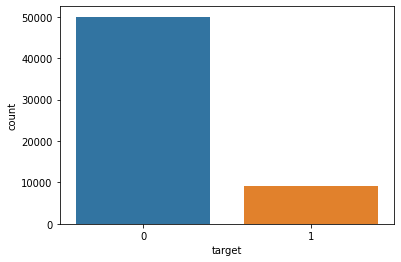

In [40]:
import seaborn as sns
sns.countplot(x='target', data=data)

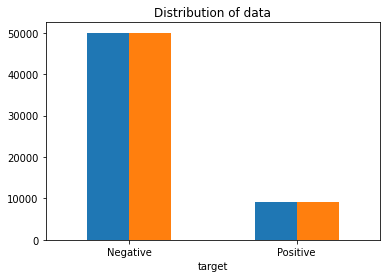

In [41]:
# Plotting the distribution for dataset.
ax = data.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(data['Clean_TweetText']), list(data['target'])

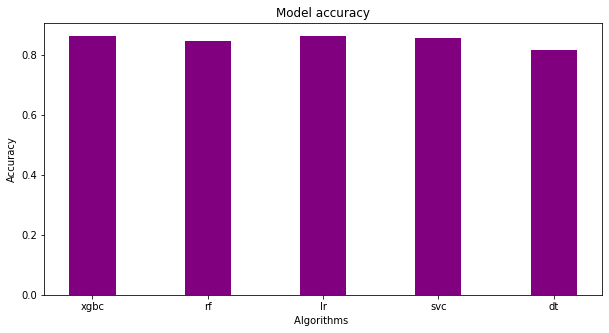

In [42]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'xgbc':0.8605809829420706, 'rf':0.8457186286100321, 'lr':0.8621854416483702,
        'svc':0.8544164837020773, 'dt':0.8159094747508867}
algorithms = list(data.keys())
accuracies = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(algorithms, accuracies, color ='purple',
        width = 0.4)
 
plt.xlabel("Algorithms ")
plt.ylabel("Accuracy")
plt.title("Model accuracy")
plt.show()